In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'/Users/anjanikumar/Desktop/learnbay/learnbay projects/Github/Linear regression'

In [3]:
dataset=pd.read_csv('50_Startups.csv')

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Data Preprocessing

In [6]:
#1.Checking for missing data 

dataset.isnull().sum()

#No missing data is present in the dataset

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<AxesSubplot:xlabel='R&D Spend'>

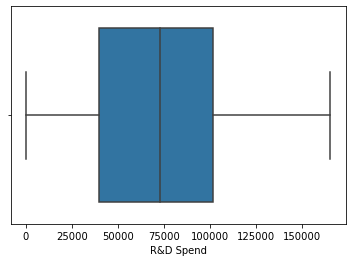

In [7]:
#2.Checking for outlier 
sns.boxplot(x = 'R&D Spend' , data=dataset )

<AxesSubplot:xlabel='Administration'>

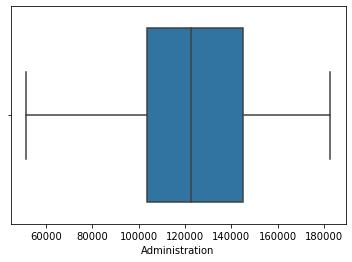

In [8]:
sns.boxplot(x = 'Administration' , data=dataset )

<AxesSubplot:xlabel='Marketing Spend'>

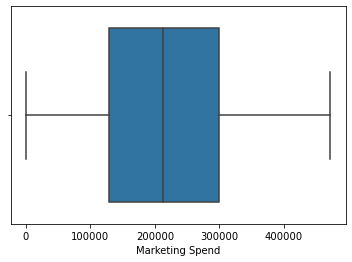

In [9]:
sns.boxplot(x = 'Marketing Spend' , data=dataset )

In [10]:
#No outlier is present.


In [11]:
#3. Encoding

In [12]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [13]:
#4. Encoding
dataset1 = pd.get_dummies(dataset, columns = ['State'])

In [14]:
dataset1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [15]:
#Selection of independent variables i.e, features and dependent variable i.e, target variable

In [16]:
X = dataset1.drop('Profit', axis=1)
Y = dataset['Profit']

In [17]:
X1= X.iloc[:,:].values
X1

array([[1.6534920e+05, 1.3689780e+05, 4.7178410e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.6259770e+05, 1.5137759e+05, 4.4389853e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 1.0114555e+05, 4.0793454e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.4437241e+05, 1.1867185e+05, 3.8319962e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 9.1391770e+04, 3.6616842e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.3187690e+05, 9.9814710e+04, 3.6286136e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.3461546e+05, 1.4719887e+05, 1.2771682e+05, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 1.4553006e+05, 3.2387668e+05, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.1161329e+05, 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [1.2333488e+05, 1.0867917e+05,

In [18]:
Y1=Y.values
Y1

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [19]:
#5.Feature Scaling
 # no outliers are present so normlaization feature technique can be used.

from sklearn.preprocessing import normalize #read its documentation
normalize(X1)


array([[3.19006328e-01, 2.64115366e-01, 9.10207689e-01, 0.00000000e+00,
        0.00000000e+00, 1.92928861e-06],
       [3.27563005e-01, 3.04959408e-01, 8.94260721e-01, 2.01456112e-06,
        0.00000000e+00, 0.00000000e+00],
       [3.42946807e-01, 2.26063621e-01, 9.11747074e-01, 0.00000000e+00,
        2.23503279e-06, 0.00000000e+00],
       [3.38629722e-01, 2.78348305e-01, 8.98805948e-01, 0.00000000e+00,
        0.00000000e+00, 2.34552933e-06],
       [3.52388047e-01, 2.26627050e-01, 9.07999364e-01, 0.00000000e+00,
        2.47973150e-06, 0.00000000e+00],
       [3.30703621e-01, 2.50302259e-01, 9.09936203e-01, 0.00000000e+00,
        0.00000000e+00, 2.50766905e-06],
       [5.68344813e-01, 6.21471815e-01, 5.39218840e-01, 4.22198767e-06,
        0.00000000e+00, 0.00000000e+00],
       [3.44500729e-01, 3.84773073e-01, 8.56311234e-01, 0.00000000e+00,
        2.64394224e-06, 0.00000000e+00],
       [3.29603858e-01, 4.06647710e-01, 8.52055712e-01, 0.00000000e+00,
        0.00000000e+00, 

# LINEAR REGRESSION MODEL BUILDING


In [20]:
# split the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X1,Y1,train_size=0.7,random_state=101)
# python bydefault consider 75% training and 25% test
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 6)
(15, 6)
(35,)
(15,)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred_lr = linear.predict(x_test)

In [26]:
r2_score(y_test, y_pred_lr)

0.9241937845112718

In [27]:
y_pred_lr_train = linear.predict(x_train)

In [28]:
r2_score(y_train, y_pred_lr_train)

0.9517559349311887

# DECISION TREE REGRESSION MODEL BUILDING 

In [40]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [41]:
y_pred_dt_test = dt.predict(x_test)

In [42]:
y_pred_dt_train = dt.predict(x_train)

In [43]:
r2_score(y_test, y_pred_dt_test)

0.7444530491503866

In [44]:
# training accuracy
r2_score(y_train, y_pred_dt_train)

1.0

# RANDOM FOREST MODEL BUILDING

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000)
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [46]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [47]:
print("Training Accuracy :", r2_score(y_train, y_pred_train_rf))
print("###"*20)
print("Test Accuracy :", r2_score(y_test, y_pred_test_rf))

Training Accuracy : 0.9877931065716703
############################################################
Test Accuracy : 0.9312201523067961


# Conclusion:

## 1. Linear Regressor gave the best model with minimum varience of 3%.
## 2. Decicion Tree model gave very high varience model
## 3. Random Forest gave model with varience of 5 % which is acceptable.